In [1]:
import pandas as pd

In [2]:
import numpy as np

In [3]:
import matplotlib.pyplot as plt

In [4]:

import os, types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.
cos_client = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='1jSTCAAD90bmuA0lBsbjxwfJKm880sHlfRc5PC_lT-M0',
    ibm_auth_endpoint="https://iam.cloud.ibm.com/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3.private.us.cloud-object-storage.appdomain.cloud')

bucket = 'crudeoilpricepredictor-donotdelete-pr-joybhciaj8ce4g'
object_key = 'Crude Oil Prices Daily.csv'

body = cos_client.get_object(Bucket=bucket,Key=object_key)['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

dataset1 = pd.read_csv(body)
dataset1.head()


,Date,Closing Value
0,1/2/1986,25.56
1,1/3/1986,26.00
2,1/6/1986,26.53
3,1/7/1986,25.85
4,1/8/1986,25.87


In [5]:
dataset1.isnull().any()

Date             False
Closing Value     True
dtype: bool

In [8]:
dataset1.isnull().sum()

Date             0
Closing Value    0
dtype: int64

In [7]:
dataset1.dropna(axis=0,inplace=True)

In [9]:
data_final=dataset1.reset_index()['Closing Value']

In [10]:
data_final

0       25.56
1       26.00
2       26.53
3       25.85
4       25.87
        ...  
8211    73.89
8212    74.19
8213    73.05
8214    73.78
8215    73.93
Name: Closing Value, Length: 8216, dtype: float64

In [11]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
data_final=scaler.fit_transform(np.array(data_final).reshape(-1,1))

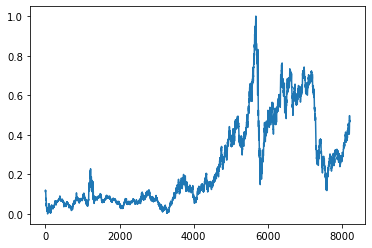

In [12]:
plt.plot(data_final)

In [13]:
training_size=int(len(data_final)*0.65)
test_size=len(data_final)-training_size
train_data,test_data=data_final[0:training_size,:],data_final[training_size:len(data_final),:1]

In [14]:
training_size,test_size

(5340, 2876)

In [15]:
train_data.shape

(5340, 1)

In [16]:
test_data.shape

(2876, 1)

In [17]:
def create_dataset(dataset,timestep=1):
    dataX,dataY=[],[]
    for i in range(len(dataset)-time_step-1):
        a=dataset[i:(i+time_step),0]
        dataX.append(a)
        dataY.append(dataset[i+time_step,0])
    return np.array(dataX),np.array(dataY)

In [18]:
time_step=10
x_train, y_train= create_dataset(train_data,time_step)
x_test, y_test = create_dataset(test_data, time_step)

In [19]:
print(x_test.shape),print(y_test.shape)

(2865, 10)
(2865,)


(None, None)

In [20]:
print(x_train.shape),print(y_train.shape)

(5329, 10)
(5329,)


(None, None)

In [21]:
x_train

array([[0.11335703, 0.11661484, 0.12053902, ..., 0.10980305, 0.1089886 ,
        0.11054346],
       [0.11661484, 0.12053902, 0.11550422, ..., 0.1089886 , 0.11054346,
        0.10165852],
       [0.12053902, 0.11550422, 0.1156523 , ..., 0.11054346, 0.10165852,
        0.09906708],
       ...,
       [0.36731823, 0.35176958, 0.36080261, ..., 0.36391234, 0.37042796,
        0.37042796],
       [0.35176958, 0.36080261, 0.35354657, ..., 0.37042796, 0.37042796,
        0.37879461],
       [0.36080261, 0.35354657, 0.35295424, ..., 0.37042796, 0.37879461,
        0.37916482]])

In [22]:
x_train= x_train.reshape(x_train.shape[0],x_train.shape[1],1)
x_test= x_test.reshape(x_test.shape[0],x_test.shape[1],1)


In [23]:
#importing libraries
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM


In [ ]:
conda install tensorflow


In [24]:
model = Sequential()

In [25]:
model.add(LSTM(50,return_sequences=True,input_shape=(10,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))

In [26]:
model.add(Dense(1))

In [27]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 10, 50)            10400     
                                                                 
 lstm_1 (LSTM)               (None, 10, 50)            20200     
                                                                 
 lstm_2 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [28]:
model.compile(loss='mean_squared_error',optimizer='adam')

In [57]:
model1=model.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=50,batch_size=64,verbose=1)

Epoch 1/50
84/84 [==============================] - 2s 20ms/step - loss: 3.8141e-05 - val_loss: 2.2677e-04
Epoch 2/50
84/84 [==============================] - 2s 20ms/step - loss: 3.7947e-05 - val_loss: 6.4153e-04
Epoch 3/50
84/84 [==============================] - 2s 25ms/step - loss: 3.5235e-05 - val_loss: 3.1454e-04
Epoch 4/50
84/84 [==============================] - 2s 25ms/step - loss: 3.4177e-05 - val_loss: 2.0435e-04
Epoch 5/50
84/84 [==============================] - 2s 21ms/step - loss: 3.3932e-05 - val_loss: 2.1217e-04
Epoch 6/50
84/84 [==============================] - 2s 21ms/step - loss: 3.1182e-05 - val_loss: 2.1916e-04
Epoch 7/50
84/84 [==============================] - 2s 24ms/step - loss: 3.2765e-05 - val_loss: 1.8484e-04
Epoch 8/50
84/84 [==============================] - 2s 20ms/step - loss: 3.3807e-05 - val_loss: 1.9742e-04
Epoch 9/50
84/84 [==============================] - 2s 22ms/step - loss: 3.4988e-05 - val_loss: 2.4828e-04
Epoch 10/50
84/84 [==================

In [30]:
from tensorflow.keras.models import load_model

model.save("data_final.h5")

In [31]:
model.save("data_final.h5")
len(test_data)

2876

In [32]:
x_input=test_data[2866:].reshape(1,-1)
x_input.shape

(1, 10)

In [33]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [34]:
temp_input


[0.44172960165852215,
 0.48111950244335855,
 0.49726047682511476,
 0.4679401747371539,
 0.4729749740855915,
 0.47119798608026064,
 0.47341922108692425,
 0.4649785280616022,
 0.4703835332444839,
 0.47149415074781587]

In [35]:

lst_output=[]
n_steps=10
i=0
while(i<10):
    if(len(temp_input)>10):
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input=x_input.reshape((1,n_steps,1))
        yhat=model.predict(x_input,verbose=0)
        print("{} day input {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input=x_input.reshape((1,n_steps,1))
        yhat=model.predict(x_input,verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
        

[0.4733196]
11
1 day input [0.4811195  0.49726048 0.46794017 0.47297497 0.47119799 0.47341922
 0.46497853 0.47038353 0.47149415 0.47331959]
1 day input [[0.47587287]]
2 day input [0.49726048 0.46794017 0.47297497 0.47119799 0.47341922 0.46497853
 0.47038353 0.47149415 0.47331959 0.47587287]
2 day input [[0.4778893]]
3 day input [0.46794017 0.47297497 0.47119799 0.47341922 0.46497853 0.47038353
 0.47149415 0.47331959 0.47587287 0.4778893 ]
3 day input [[0.4791701]]
4 day input [0.47297497 0.47119799 0.47341922 0.46497853 0.47038353 0.47149415
 0.47331959 0.47587287 0.4778893  0.47917011]
4 day input [[0.48014382]]
5 day input [0.47119799 0.47341922 0.46497853 0.47038353 0.47149415 0.47331959
 0.47587287 0.4778893  0.47917011 0.48014382]
5 day input [[0.48064476]]
6 day input [0.47341922 0.46497853 0.47038353 0.47149415 0.47331959 0.47587287
 0.4778893  0.47917011 0.48014382 0.48064476]
6 day input [[0.48087505]]
7 day input [0.46497853 0.47038353 0.47149415 0.47331959 0.47587287 0.47788

In [36]:
day_new=np.arange(1,11)
day_pred=np.arange(11,21)

In [37]:
len(data_final)

8216

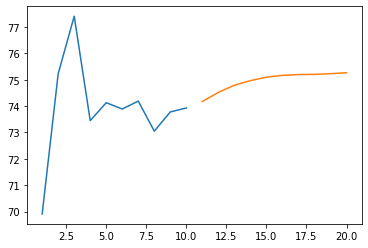

In [38]:
plt.plot(day_new,scaler.inverse_transform(data_final[8206:]))
plt.plot(day_pred,scaler.inverse_transform(lst_output))

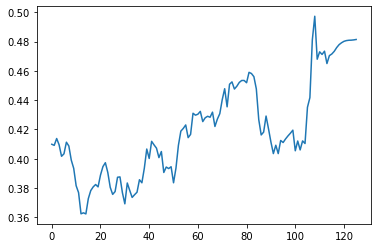

In [39]:
df3=data_final.tolist()
df3.extend(lst_output)
plt.plot(df3[8100:])

In [43]:
from ibm_watson_machine_learning import APIClient
wml_credentials = {
    "url": "https://us-south.ml.cloud.ibm.com",
    "apikey": "UPWRFTFhkvYA6wNCvrVT21hKgkcyyWYJTLut7wa6eSRu"
}
client=APIClient(wml_credentials)

In [41]:
!pip install ibm_watson_machine_learning

In [50]:
def guid_from_space_name(client, space_name):
    space=client.spaces.get_details()
    return(next(item for item in space['resources'] if item['entity']["name"] == space_name)['metadata']['id'])

In [51]:
space_uid=guid_from_space_name(client,'models')
print("Space UID =" + space_uid)

Space UID =84775292-16ec-4944-b70d-9a69920281de


In [53]:
client.set.default_space(space_uid)
client.software_specifications.list()

-----------------------------  ------------------------------------  ----
NAME                           ASSET_ID                              TYPE
default_py3.6                  0062b8c9-8b7d-44a0-a9b9-46c416adcbd9  base
kernel-spark3.2-scala2.12      020d69ce-7ac1-5e68-ac1a-31189867356a  base
pytorch-onnx_1.3-py3.7-edt     069ea134-3346-5748-b513-49120e15d288  base
scikit-learn_0.20-py3.6        09c5a1d0-9c1e-4473-a344-eb7b665ff687  base
spark-mllib_3.0-scala_2.12     09f4cff0-90a7-5899-b9ed-1ef348aebdee  base
pytorch-onnx_rt22.1-py3.9      0b848dd4-e681-5599-be41-b5f6fccc6471  base
ai-function_0.1-py3.6          0cdb0f1e-5376-4f4d-92dd-da3b69aa9bda  base
shiny-r3.6                     0e6e79df-875e-4f24-8ae9-62dcc2148306  base
tensorflow_2.4-py3.7-horovod   1092590a-307d-563d-9b62-4eb7d64b3f22  base
pytorch_1.1-py3.6              10ac12d6-6b30-4ccd-8392-3e922c096a92  base
tensorflow_1.15-py3.6-ddl      111e41b3-de2d-5422-a4d6-bf776828c4b7  base
autoai-kb_rt22.2-py3.10        125b6d9

In [102]:
software_spec_uid=client.software_specifications.get_uid_by_name("runtime-22.1-py3.9")
software_spec_uid

'12b83a17-24d8-5082-900f-0ab31fbfd3cb'

In [99]:
model_details =  client.repository.store_model(model='data_final.tgz',meta_props={
    client.repository.ModelMetaNames.NAME:"Crude_oil_price",
    client.repository.ModelMetaNames.TYPE:"tensorflow_rt22.1",
    client.repository.ModelMetaNames.SOFTWARE_SPEC_UID:software_spec_uid }
                                              )
model_id=client.repository.get_model_uid(model_details)

This method is deprecated, please use get_model_id()


In [66]:
model_result_path="data_final.h5"
model.save(model_result_path)

In [68]:
!tar -zcvf data_final.tgz data_final.h5

data_final.h5


In [96]:
model_id


'f83e2c1b-0695-4350-9647-3b1905af367f'

In [111]:
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,y_test))

ValueError: Found input variables with inconsistent numbers of samples: [5329, 2865]

In [112]:
train_predict=scaler.inverse_transform(train_)

NameError: name 'train_predict' is not defined

In [113]:
x_input

array([[[0.47149415],
        [0.47331959],
        [0.47587287],
        [0.4778893 ],
        [0.47917011],
        [0.48014382],
        [0.48064476],
        [0.48087505],
        [0.4809376 ],
        [0.48111716]]])

In [115]:
x_train

array([[[0.11335703],
        [0.11661484],
        [0.12053902],
        ...,
        [0.10980305],
        [0.1089886 ],
        [0.11054346]],

       [[0.11661484],
        [0.12053902],
        [0.11550422],
        ...,
        [0.1089886 ],
        [0.11054346],
        [0.10165852]],

       [[0.12053902],
        [0.11550422],
        [0.1156523 ],
        ...,
        [0.11054346],
        [0.10165852],
        [0.09906708]],

       ...,

       [[0.36731823],
        [0.35176958],
        [0.36080261],
        ...,
        [0.36391234],
        [0.37042796],
        [0.37042796]],

       [[0.35176958],
        [0.36080261],
        [0.35354657],
        ...,
        [0.37042796],
        [0.37042796],
        [0.37879461]],

       [[0.36080261],
        [0.35354657],
        [0.35295424],
        ...,
        [0.37042796],
        [0.37879461],
        [0.37916482]]])

In [116]:
y_test

array([0.3465867 , 0.34355101, 0.34177403, ..., 0.47341922, 0.46497853,
       0.47038353])